In [3]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
from itertools import combinations 

plt.style.use('fivethirtyeight')

In [5]:

stock_list = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'GOOGL', 'FB', 'BRK_B', 'JNJ', 'V', 'PG', 'JPM', 'UNH', 'MA', 'INTC', 'VZ','HD', 'T', 'PFE', 'MRK', 'PEP']


comb = combinations(['AAPL', 'MSFT', 'AMZN', 'GOOG', 'GOOGL', 'FB', 'BRK_B', 'JNJ', 'V', 'PG', 'JPM', 'UNH', 'MA', 'INTC', 'VZ', 'HD', 'T', 'PFE', 'MRK', 'PEP'], 5)


data = quandl.get_table('WIKI/PRICES', ticker = stock_list,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2015-1-1', 'lte': '2019-12-31' }, paginate=True)

data.head()

,date,ticker,adj_close
None,,,
0,2018-03-27,VZ,47.31
1,2018-03-26,VZ,47.07
2,2018-03-23,VZ,46.29
3,2018-03-22,VZ,46.88
4,2018-03-21,VZ,47.28


In [6]:
# stocks is the list containing all possible combinations of 5 stocks from the list of 20 stocks
stocks=[]
for i in list(comb):
    stocks.append(list(i))


In [7]:
#Table containing all possible combinations of 5 stocks from the list of 20 stocks
portfolio_table = pd.DataFrame(stocks)
portfolio_table

,0,1,2,3,4
0,AAPL,MSFT,AMZN,GOOG,GOOGL
1,AAPL,MSFT,AMZN,GOOG,FB
2,AAPL,MSFT,AMZN,GOOG,BRK_B
3,AAPL,MSFT,AMZN,GOOG,JNJ
4,AAPL,MSFT,AMZN,GOOG,V
...,...,...,...,...,...
15499,VZ,HD,T,PFE,PEP
15500,VZ,HD,T,MRK,PEP
15501,VZ,HD,PFE,MRK,PEP
15502,VZ,T,PFE,MRK,PEP


In [9]:
df = data.set_index('date')
table = df.pivot(columns='ticker')
table.columns = [col[1] for col in table.columns]
table.head()

,AAPL,AMZN,BRK_B,FB,GOOG,GOOGL,HD,INTC,JNJ,JPM,MA,MRK,MSFT,PEP,PFE,PG,T,UNH,V,VZ
date,,,,,,,,,,,,,,,,,,,,
2015-01-02,103.863957,308.52,149.17,78.450,524.81,529.55,97.510860,33.034704,96.227783,58.152827,83.771963,52.449748,43.344312,87.319363,28.097891,82.193051,29.007725,96.350795,64.958978,41.401794
2015-01-05,100.937944,302.19,147.00,77.190,513.87,519.46,95.465046,32.662200,95.555698,56.347474,81.415632,53.229295,42.941088,86.662896,27.945429,81.802262,28.733663,94.763750,63.525086,41.057954
2015-01-06,100.947444,295.29,146.84,76.150,501.96,506.64,95.172787,32.053475,95.086160,54.886441,81.239640,55.320315,42.315395,86.006429,28.178606,81.429648,28.776486,94.572540,63.115753,41.472325
2015-01-07,102.362951,298.42,148.88,76.150,501.10,505.15,98.434776,32.725798,97.185273,54.970195,82.500913,56.503392,42.853027,88.521345,28.564246,81.856790,28.810743,95.538151,63.961381,41.207833
2015-01-08,106.295968,300.46,151.37,78.175,502.68,506.91,100.612579,33.334523,97.949424,56.198579,83.784173,57.640613,44.113683,90.130152,29.147190,82.792868,29.097374,100.098514,64.819265,42.091049


In [10]:
#Setting the parameters
returns = table.pct_change()
mean_returns = returns.mean()

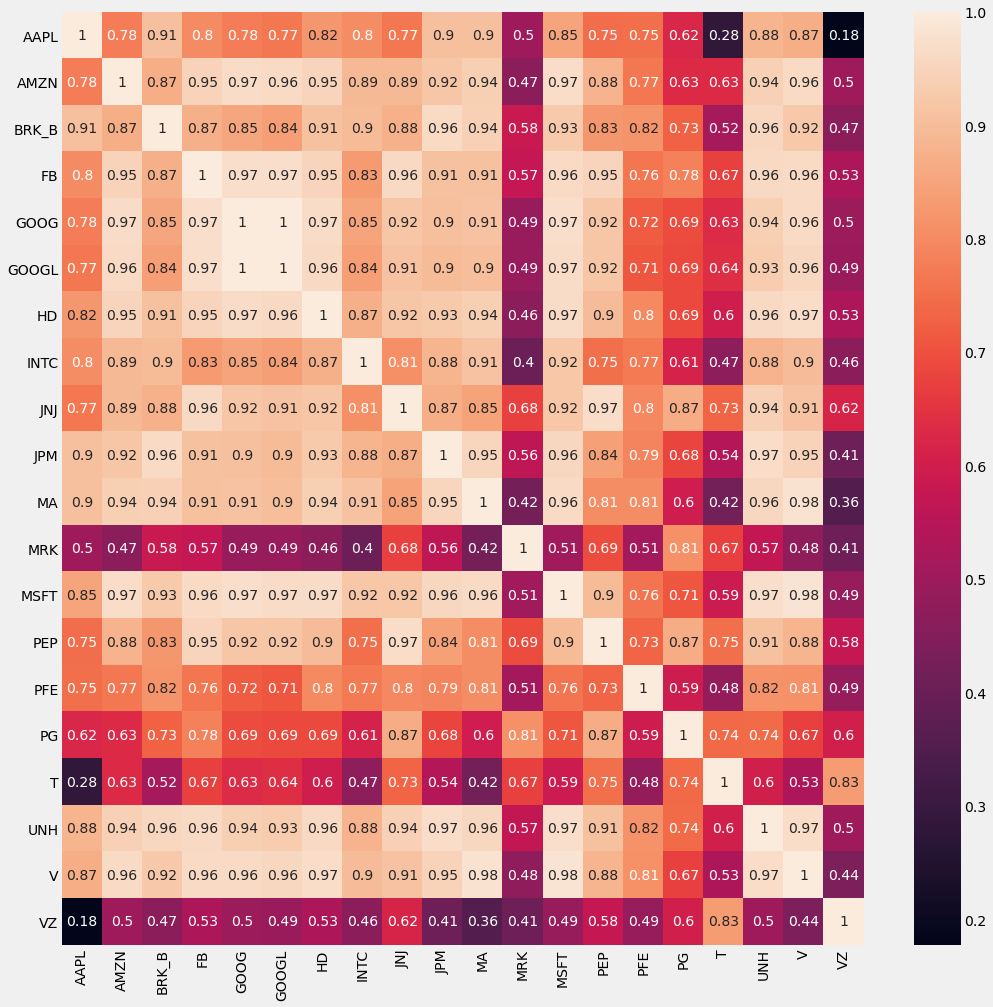

In [11]:
#Plotting the covariance heatmap
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(table.corr(), annot = True)

In [12]:
def variance(portfolio_list):
    variance = []
    for portfolio in portfolio_list:
        portfolio_cov = (0.20*0.20) * table[portfolio].pct_change().cov() * 252
        variance.append(np.sqrt(portfolio_cov.values.sum()))
        
    return variance

In [13]:
def returns(portfolio_list):
    returns = []
    for portfolio in portfolio_list:
        returns.append(np.sum(mean_returns[portfolio]*0.20)*252)
        
    return returns

In [13]:
portfolio_table['Volatility'] = variance(stocks)
portfolio_table['Returns'] = returns(stocks)
portfolio_table

,0,1,2,3,4,Volatility,Returns
0,AAPL,MSFT,AMZN,GOOG,GOOGL,0.197046,0.282640
1,AAPL,MSFT,AMZN,GOOG,FB,0.194645,0.284952
2,AAPL,MSFT,AMZN,GOOG,BRK_B,0.176708,0.257134
3,AAPL,MSFT,AMZN,GOOG,JNJ,0.172725,0.257157
4,AAPL,MSFT,AMZN,GOOG,V,0.185456,0.278245
...,...,...,...,...,...,...,...
15499,VZ,HD,T,PFE,PEP,0.121421,0.096402
15500,VZ,HD,T,MRK,PEP,0.124832,0.085089
15501,VZ,HD,PFE,MRK,PEP,0.125583,0.087692
15502,VZ,T,PFE,MRK,PEP,0.124610,0.062299


In [16]:
vol = portfolio_table['Volatility'].tolist()

Text(0, 0.5, 'Returns')

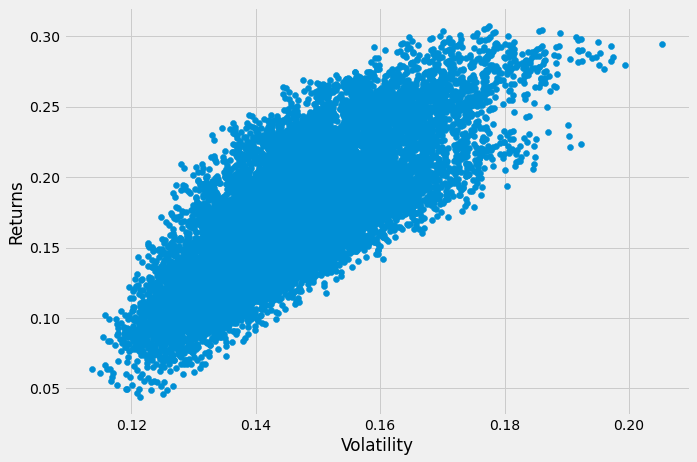

In [21]:
plt.figure(figsize=(10, 7))
plt.scatter(portfolio_table['Volatility'], portfolio_table['Returns'])
plt.xlabel('Volatility')
plt.ylabel('Returns')

The variance of the portfolio (risk) is given by:
$$Var(X) = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i \hspace{0.1cm} w_j \hspace{0.1cm} Cov(X_i, X_j)$$

where $w_i$ and $w_j$ are the weights of the $i^{\text{th}}$ and $j^{\text{th}}$ stock in the portfolio
but since we are only trying to find the correlation between the stock in the portfolio all the stocks have the same weights (0.2). Hence, the variance of the portfolio is directly proportional to the sum of the covariances and the equation becomes:

$$Var(X) = (0.2 * 0.2) \sum_{i=1}^{n} \sum_{j=1}^{n} Cov(X_i, X_j)$$

Also, the correlation is proportional to the the covariance 
$$\rho(X, Y) = \frac{Cov(X, Y)}{\sqrt {(Var(X) \hspace{0.2cm}  Var(Y))}}$$

Hence, the portfolio with the least variance corresponds to the portfolio with the least correlation between the stocks.

In [22]:
print('The least correlated stocks are', stocks[vol.index(min(vol))])

The least correlated stocks are ['JNJ', 'PG', 'T', 'PFE', 'PEP']
